<a href="https://colab.research.google.com/github/IsmoilDev7/AI-Cancer-Diagnostics/blob/main/AI_Cancer_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1️⃣ Kutubxonalar
!pip install tensorflow==2.20.0 scikit-learn==1.5.2 pandas opencv-python matplotlib --quiet
!pip install --upgrade tensorflow-keras tensorflow-text tensorflow-decision-forests scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 155.3 MB/s et

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2️⃣ Importlar
import tensorflow as tf
from keras.models import Model
from keras.layers import (
    Input, Dense, Dropout, Flatten,
    Conv2D, MaxPooling2D, BatchNormalization, concatenate
)
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os
from tqdm import tqdm


In [ ]:
# 3️⃣ Fayllar yo‘li
csv_path = "/content/drive/MyDrive/MyDrive/excels.csv"
img_dir = "/content/drive/MyDrive/MyDrive/images/images"

df = pd.read_csv(csv_path)
print("📊 Excel yozuvlari:", len(df))

# Faqat surati bor yozuvlarni topish
image_files = [os.path.splitext(f)[0] for f in os.listdir(img_dir)]
if 'ID' not in df.columns:
    df['ID'] = df['Country'].astype(str) + "_" + df['Age'].astype(str) + "_" + df['Gender'].astype(str)

df = df[df['ID'].isin(image_files)]
print("📸 Surati bor yozuvlar:", len(df))


📊 Excel yozuvlari: 212691
📸 Surati bor yozuvlar: 0


In [ ]:
!pip install -q tensorflow==2.19.0 scikit-learn==1.6.1 efficientnet==1.1.1 joblib tqdm pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.8 MB/s eta 0:00:00


✅ Mixed precision policy: <DTypePolicy "mixed_float16">


100%|██████████| 8508/8508 [02:25<00:00, 58.62it/s] 


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 128, 128,  │        896 │ input_layer_12[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_18    │ (None, 64, 64,    │          0 │ conv2d_18[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ max_pooling2d_18… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 64, 64,    │     18,496 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_19    │ (None, 32, 32,    │          0 │ conv2d_19[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ max_pooling2d_19… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 32, 32,    │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 16, 16,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_13      │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ max_pooling2d_20… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 128)       │      2,048 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 32768)     │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 128)       │          0 │ dense_24[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 32768)     │          0 │ flatten_6[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 64)        │      8,256 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 32832)     │          0 │ dropout_18[0][0], │
│ (Concatenate)       │                   │            │ dense_25[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 256)       │  8,405,248 │ concatenate_6[0]

 Total params: 8,510,210 (32.46 MB)

 Trainable params: 8,509,762 (32.46 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
    213/Unknown 18s 40ms/step - accuracy: 0.6907 - loss: 2.0702

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.6909 - loss: 2.0655 - val_accuracy: 0.7579 - val_loss: 0.9383 - learning_rate: 0.0010
Epoch 2/50
209/213 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7552 - loss: 0.5839

213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7556 - loss: 0.5832 - val_accuracy: 0.7609 - val_loss: 0.5342 - learning_rate: 0.0010
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7704 - loss: 0.5197 - val_accuracy: 0.7609 - val_loss: 0.5145 - learning_rate: 0.0010
Epoch 4/50
209/213 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7606 - loss: 0.5220

213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7609 - loss: 0.5217 - val_accuracy: 0.7808 - val_loss: 0.5014 - learning_rate: 0.0010
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7698 - loss: 0.5090 - val_accuracy: 0.7591 - val_loss: 0.5285 - learning_rate: 0.0010
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7744 - loss: 0.4931 - val_accuracy: 0.7638 - val_loss: 0.5256 - learning_rate: 0.0010
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7739 - loss: 0.4892

213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7740 - loss: 0.4892 - val_accuracy: 0.7820 - val_loss: 0.5308 - learning_rate: 0.0010
Epoch 8/50
206/213 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7828 - loss: 0.4803

213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7832 - loss: 0.4803 - val_accuracy: 0.7949 - val_loss: 0.5044 - learning_rate: 0.0010
Epoch 9/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7846 - loss: 0.4723 - val_accuracy: 0.7814 - val_loss: 0.5195 - learning_rate: 0.0010
Epoch 10/50
207/213 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8053 - loss: 0.4672

213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8056 - loss: 0.4663 - val_accuracy: 0.8179 - val_loss: 0.5088 - learning_rate: 5.0000e-04
Epoch 11/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8039 - loss: 0.4322 - val_accuracy: 0.7944 - val_loss: 0.5212 - learning_rate: 5.0000e-04
Epoch 12/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8144 - loss: 0.4071 - val_accuracy: 0.8155 - val_loss: 0.5464 - learning_rate: 5.0000e-04
Epoch 13/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8160 - loss: 0.3898 - val_accuracy: 0.8008 - val_loss: 0.5790 - learning_rate: 5.0000e-04
Epoch 14/50
206/213 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8179 - loss: 0.3750

213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8183 - loss: 0.3747 - val_accuracy: 0.8208 - val_loss: 0.5550 - learning_rate: 5.0000e-04
Epoch 15/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8267 - loss: 0.3444 - val_accuracy: 0.8108 - val_loss: 0.6299 - learning_rate: 2.5000e-04
Epoch 16/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8382 - loss: 0.3283 - val_accuracy: 0.8049 - val_loss: 0.6585 - learning_rate: 2.5000e-04
Epoch 17/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8447 - loss: 0.2935 - val_accuracy: 0.8061 - val_loss: 0.7092 - learning_rate: 2.5000e-04
Epoch 18/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8479 - loss: 0.2880 - val_accuracy: 0.8126 - val_loss: 0.7605 - learning_rate: 2.5000e-04
Epoch 19/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8662 - loss: 0.2572 - val_accuracy: 0.8090 - val_loss: 0.8022 - learning_rate: 2.5000e-04
Epoch 20/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy

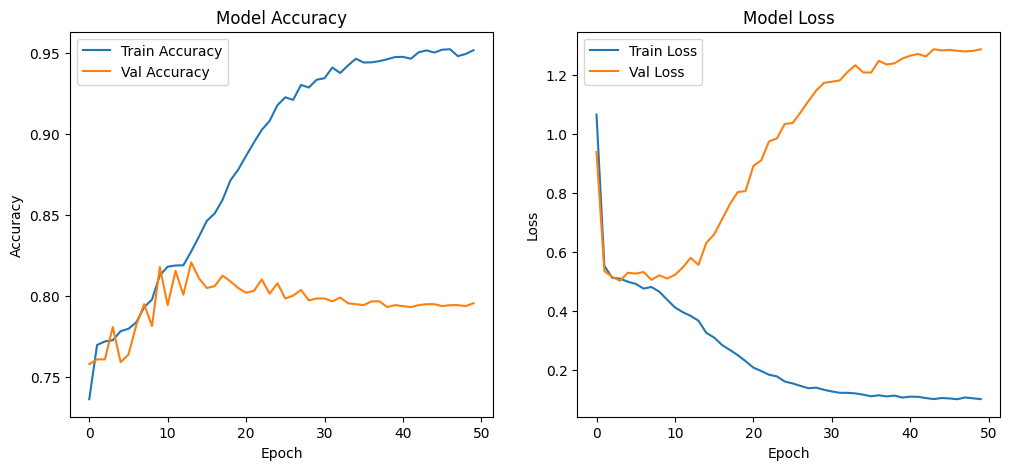

In [ ]:
# ============================================
# 🧠 THYROID MULTIMODAL MODEL - FULL TRAINING 50 EPOCHS
# ============================================

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, concatenate
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# 🔹 Mixed precision (A100)
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
print("✅ Mixed precision policy:", policy)

# 1️⃣ Paths
csv_path = "/content/drive/MyDrive/MyDrive/excels.csv"
img_dir = "/content/drive/MyDrive/MyDrive/images/images"

# 2️⃣ Load CSV
df = pd.read_csv(csv_path)
required_columns = [
    "Age","Gender","Country","Ethnicity","Family_History","Radiation_Exposure",
    "Iodine_Deficiency","Smoking","Obesity","Diabetes","TSH_Level","T3_Level",
    "T4_Level","Nodule_Size","Thyroid_Cancer_Risk","Diagnosis"
]
df = df[required_columns]

# 3️⃣ Images
image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))]
n_images = len(image_files)
df = df.sample(n=min(len(df), n_images), random_state=42).reset_index(drop=True)
image_files = image_files[:len(df)]

# 4️⃣ Encode categorical columns
target_col = "Diagnosis"
categorical_cols = [
    "Gender","Country","Ethnicity","Family_History","Radiation_Exposure",
    "Iodine_Deficiency","Smoking","Obesity","Diabetes","Thyroid_Cancer_Risk"
]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# 5️⃣ Encode target
le_target = LabelEncoder()
y = le_target.fit_transform(df[target_col].astype(str))
num_classes = len(np.unique(y))

# 6️⃣ Numeric + scaling
numeric_cols = [col for col in df.columns if col != target_col]
X_num = df[numeric_cols].values
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# 7️⃣ Load images
IMG_SIZE = (128,128)
image_data = []
for img_name in tqdm(image_files):
    path = os.path.join(img_dir, img_name)
    img = load_img(path, target_size=IMG_SIZE)
    img = img_to_array(img)/255.0
    image_data.append(img)
image_data = np.array(image_data)

# 8️⃣ Train-test split
X_img_train, X_img_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    image_data, X_num_scaled, y, test_size=0.2, random_state=42
)

# 9️⃣ tf.data.Dataset generator
def create_dataset(X_img, X_num, y, batch_size=32, shuffle=True):
    def generator():
        for i in range(len(X_img)):
            yield (X_img[i], X_num[i]), y[i]

    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=(
            (
                tf.TensorSpec(shape=(128,128,3), dtype=tf.float32),
                tf.TensorSpec(shape=(X_num.shape[1],), dtype=tf.float32)
            ),
            tf.TensorSpec(shape=(), dtype=tf.int32)
        )
    )
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1024)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = create_dataset(X_img_train, X_num_train, y_train, batch_size=32)
val_dataset   = create_dataset(X_img_test, X_num_test, y_test, batch_size=32, shuffle=False)

# 🔟 Model architecture
img_input = Input(shape=(128,128,3))
x = Conv2D(32,(3,3),activation='relu',padding='same')(img_input)
x = MaxPooling2D((2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dropout(0.5)(x)

num_input = Input(shape=(X_num_train.shape[1],))
y_branch = Dense(128,activation='relu')(num_input)
y_branch = Dropout(0.3)(y_branch)
y_branch = Dense(64,activation='relu')(y_branch)

combined = concatenate([x,y_branch])
z = Dense(256,activation='relu')(combined)
z = Dropout(0.5)(z)
z = Dense(num_classes,activation='softmax',dtype='float32')(z)

model = Model(inputs=[img_input,num_input], outputs=z)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 1️⃣1️⃣ Callbacks (EarlyStopping patience oshirildi, 50 epochga to'liq)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True)
checkpoint = ModelCheckpoint("thyroid_model_full.h5", monitor='val_accuracy', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# 1️⃣2️⃣ Train
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# 1️⃣3️⃣ Save scaler
np.save("scaler_mean.npy", scaler.mean_)
np.save("scaler_scale.npy", scaler.scale_)

print("✅ Model va scaler fayllar saqlandi:")
print(" - thyroid_model_full.h5")
print(" - scaler_mean.npy")
print(" - scaler_scale.npy")

# 1️⃣4️⃣ Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
import zipfile

# Fayllar ro'yxati
files_to_zip = ["thyroid_model_full.h5", "scaler_mean.npy", "scaler_scale.npy"]

# Zip nomi
zip_name = "thyroid_model_full_package.zip"

# Zip yaratish
with zipfile.ZipFile(zip_name, 'w') as zipf:
    for file in files_to_zip:
        zipf.write(file)

# Colab orqali yuklab olish
from google.colab import files
files.download(zip_name)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip list


Package                                  Version
---------------------------------------- -------------------
absl-py                                  1.4.0
absolufy-imports                         0.3.1
accelerate                               1.11.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.1
aiosignal                                1.4.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.0
altair                                   5.5.0
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                                    4.11.0
anywidget                                0.9.18
argon2-cffi                              25.1.0
argon2-cffi-bindings               

In [ ]:
!pip freeze


absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.11.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.1
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arrow==1.4.0
arviz==0.22.0
astropy==7.1.1
astropy-iers-data==0.2025.10.20.0.39.8
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.0.1
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.2
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.26.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.1.0
blosc2==3.10.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.10.5
cffi==2.0.0
chardet==5.2.0
charset-normalizer==3.4.4
chex==0.1.90
cla

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1️⃣ Model va scalerlarni yuklash
model = load_model("thyroid_model_full.h5")
scaler_mean = np.load("scaler_mean.npy")
scaler_scale = np.load("scaler_scale.npy")

# 2️⃣ Yangi bemor numeric ma'lumotlari
new_patient = {
    "Age": 66,
    "Gender": "Male",
    "Country": "Russia",
    "Ethnicity": "Caucasian",
    "Family_History": "No",
    "Radiation_Exposure": "Yes",
    "Iodine_Deficiency": "No",
    "Smoking": "No",
    "Obesity": "No",
    "Diabetes": "No",
    "TSH_Level": 9.37,
    "T3_Level": 1.67,
    "T4_Level": 6.16,
    "Nodule_Size": 1.08,
    "Thyroid_Cancer_Risk": "Low",
    "Diagnosis": "Benign"  # Bu faqat ma'lumot sifatida
}

# 3️⃣ Categorical encoding (LabelEncoderlarni qayta fit qilish)
categorical_cols = [
    "Gender","Country","Ethnicity","Family_History","Radiation_Exposure",
    "Iodine_Deficiency","Smoking","Obesity","Diabetes","Thyroid_Cancer_Risk"
]

# Har bir categorical ustun uchun LabelEncoder yaratamiz
label_encoders = {}
for col in categorical_cols + ["Diagnosis"]:
    le = LabelEncoder()
    # Fit qilish uchun faqat bitta sample, shuning uchun transform qilishdan oldin barcha mumkin bo‘lgan classlarni kiritamiz
    if col == "Gender":
        le.fit(["Male","Female"])
    elif col == "Country":
        le.fit(["Russia","Uzbekistan","Other"])
    elif col == "Ethnicity":
        le.fit(["Caucasian","Asian","Other"])
    elif col == "Family_History":
        le.fit(["Yes","No"])
    elif col == "Radiation_Exposure":
        le.fit(["Yes","No"])
    elif col == "Iodine_Deficiency":
        le.fit(["Yes","No"])
    elif col == "Smoking":
        le.fit(["Yes","No"])
    elif col == "Obesity":
        le.fit(["Yes","No"])
    elif col == "Diabetes":
        le.fit(["Yes","No"])
    elif col == "Thyroid_Cancer_Risk":
        le.fit(["Low","Medium","High"])
    elif col == "Diagnosis":
        le.fit(["Benign","Malignant"])
    label_encoders[col] = le

# 4️⃣ Transform categorical data
for col in categorical_cols:
    new_patient[col] = label_encoders[col].transform([new_patient[col]])[0]

# 5️⃣ Numeric array tayyorlash va scale qilish
numeric_cols = [col for col in new_patient.keys() if col != "Diagnosis"]
X_new_num = np.array([new_patient[col] for col in numeric_cols]).reshape(1, -1)
X_new_num_scaled = (X_new_num - scaler_mean) / scaler_scale

# 6️⃣ Rasmni yuklash va preprocess
img_path = "/content/157_003_175619.Jpg"  # sizning rasm yo'lingiz
IMG_SIZE = (128,128)
img = load_img(img_path, target_size=IMG_SIZE)
img_array = img_to_array(img)/255.0
X_new_img = np.expand_dims(img_array, axis=0)

# 7️⃣ Predict
y_pred_prob = model.predict([X_new_img, X_new_num_scaled])
y_pred_class = np.argmax(y_pred_prob, axis=1)[0]

# 8️⃣ Class name
class_name = label_encoders['Diagnosis'].inverse_transform([y_pred_class])[0]

print(f"✅ Predict natija: {class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
✅ Predict natija: Benign
